In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
743,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [6]:
features = ["Sex"]
sex_features =  pd.get_dummies(train_data[features])
train_data= pd.concat([train_data,sex_features],axis=1)
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,1,0
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,0,1
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,0,1
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S,0,1
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S,0,1
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,1,0
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,1,0
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q,0,1
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S,0,1
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q,0,1


In [7]:
emb_ord_map = {'C': 1, 'Q': 2, 'S': 3 }
train_data['EmbarkedLabel'] = train_data['Embarked'].map(emb_ord_map)

In [8]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,EmbarkedLabel
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S,1,0,3.0
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S,1,0,3.0
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S,1,0,3.0
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,0,1,3.0
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S,0,1,3.0
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q,0,1,2.0
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,1,0,2.0
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S,1,0,3.0
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,0,1,3.0
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C,0,1,1.0


In [9]:
# find and Handle Missing Values

train_data['Age'] = train_data['Age'].replace(np.NaN, train_data['Age'].mean())

train_data['Cabin'] = train_data['Cabin'].fillna('U')

train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,EmbarkedLabel
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,29.699118,1,0,PC 17604,82.1708,U,C,1,0,1.0
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.000000,0,1,113505,55.0000,E33,S,1,0,3.0
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.000000,0,0,374887,7.2500,U,S,0,1,3.0
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.000000,0,0,STON/O 2. 3101292,7.9250,U,S,0,1,3.0
643,644,1,3,"Foo, Mr. Choong",male,29.699118,0,0,1601,56.4958,U,S,0,1,3.0
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.000000,0,0,234360,13.0000,U,S,0,1,3.0
622,623,1,3,"Nakid, Mr. Sahid",male,20.000000,1,1,2653,15.7417,U,C,0,1,1.0
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.000000,0,0,223596,13.5000,U,S,1,0,3.0
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.000000,0,0,C 4001,22.5250,U,S,0,1,3.0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S,0,1,3.0


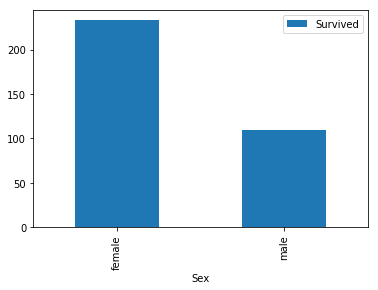

In [10]:
import matplotlib.pyplot as plt

#train_data[['Sex','Survived']].plot.bar( color='#0504aa')
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Sex')
# plt.ylabel('Survived')
# plt.title('Survived by Gender')
# plt
train_data[['Survived','Sex']].groupby('Sex').sum().plot.bar()


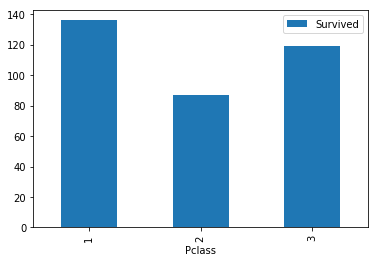

In [11]:
train_data[['Survived','Pclass']].groupby('Pclass').sum().plot.bar()

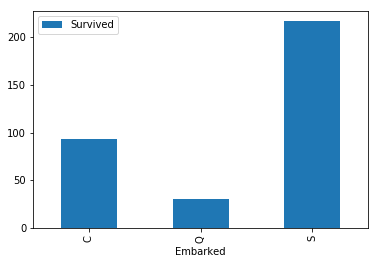

In [12]:
train_data[['Survived','Embarked']].groupby('Embarked').sum().plot.bar()